In [2]:
!pip install pca

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca

ModuleNotFoundError: No module named 'pca'

In [4]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (7,5)

In [4]:
uploaded = files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rajbhensdadiya/inse-6220-final-project/main/heart_statlog_cleveland_hungary_final.csv')
print(df.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [6]:
abbreviations = {
    'sex': 'Sex', 'chest pain type': 'CPT', 'resting bp s': 'RBP',
    'cholesterol': 'Chol', 'fasting blood sugar': 'FBS', 'resting ecg': 'ECG',
    'max heart rate': 'MHR', 'exercise angina': 'ExAng', 'oldpeak': 'OP',
    'ST slope': 'STS', 'target': 'Target'
}
df.columns = [abbreviations.get(x, x) for x in df.columns]

In [7]:
df.head()

,age,Sex,CPT,RBP,Chol,FBS,ECG,MHR,ExAng,OP,STS,Target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
X = df.drop(columns=['Target'])
print(X.head(10))
print('\n')
print(X.describe().transpose)

   age  Sex  CPT  RBP  Chol  FBS  ECG  MHR  ExAng   OP  STS
0   40    1    2  140   289    0    0  172      0  0.0    1
1   49    0    3  160   180    0    0  156      0  1.0    2
2   37    1    2  130   283    0    1   98      0  0.0    1
3   48    0    4  138   214    0    0  108      1  1.5    2
4   54    1    3  150   195    0    0  122      0  0.0    1
5   39    1    3  120   339    0    0  170      0  0.0    1
6   45    0    2  130   237    0    0  170      0  0.0    1
7   54    1    2  110   208    0    0  142      0  0.0    1
8   37    1    4  140   207    0    0  130      1  1.5    2
9   48    0    2  120   284    0    0  120      0  0.0    1


<bound method DataFrame.transpose of                age          Sex          CPT          RBP         Chol  \
count  1190.000000  1190.000000  1190.000000  1190.000000  1190.000000   
mean     53.720168     0.763866     3.232773   132.153782   210.363866   
std       9.358203     0.424884     0.935480    18.368823   101.420489   
min  

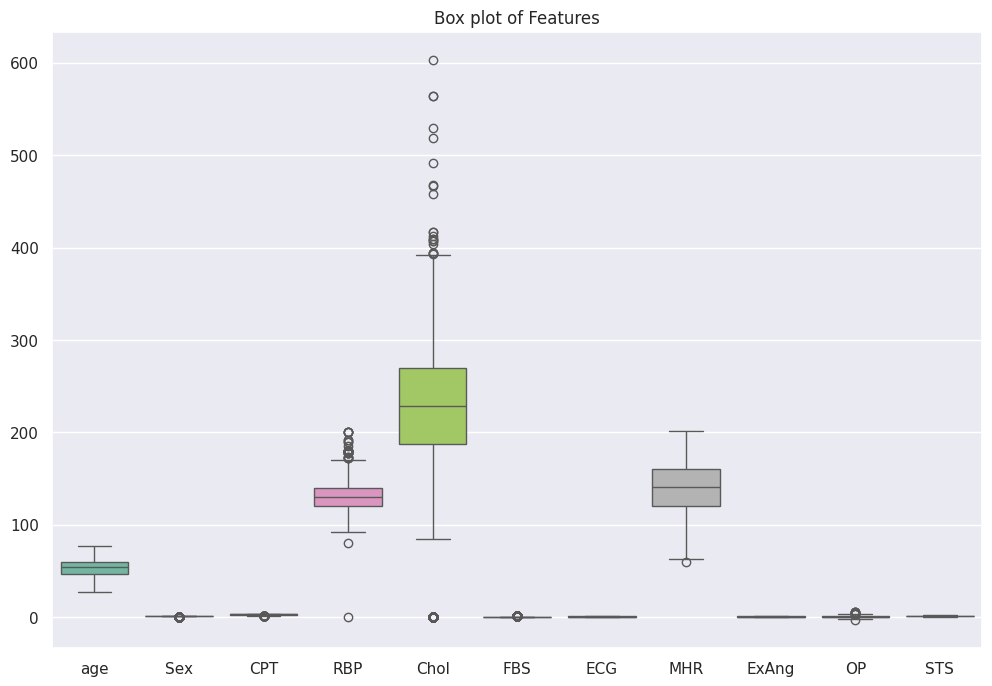

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient="v", palette="Set2")
plt.title("Box plot of Features")
plt.show()

In [10]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols


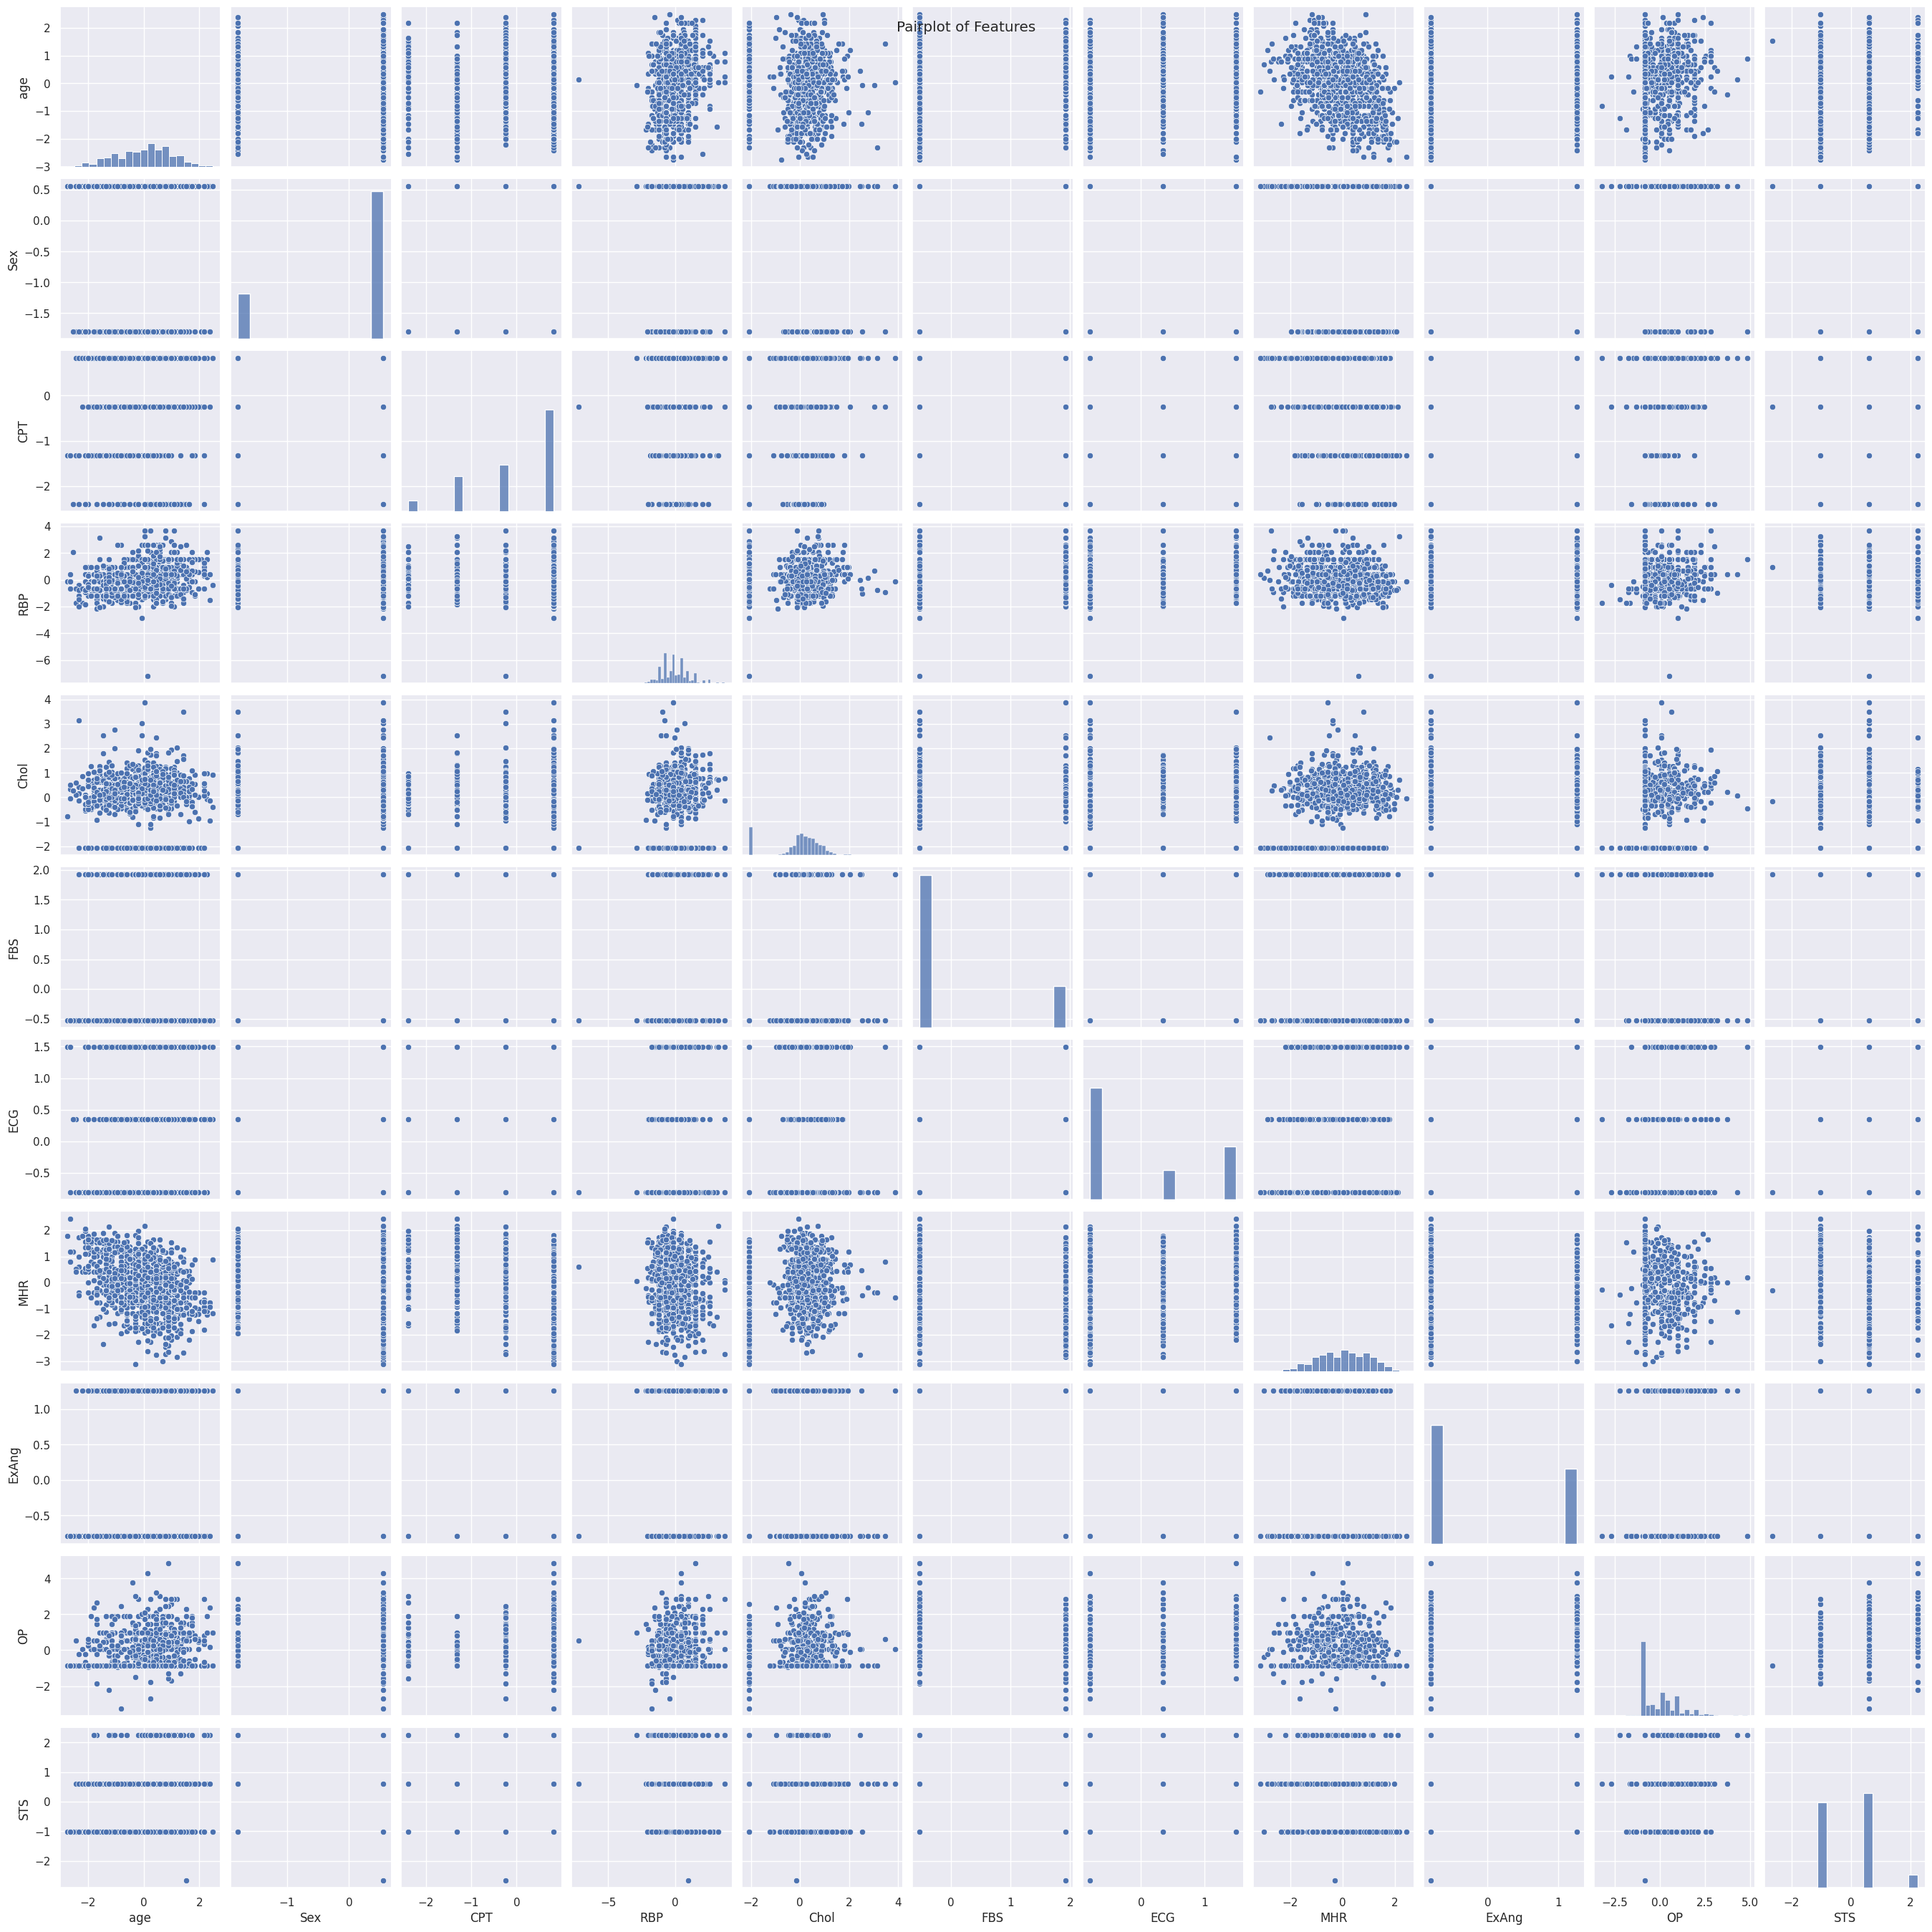

In [11]:
sns.pairplot(X)
plt.suptitle('Pairplot of Features')
plt.show()

In [13]:
pca = PCA()
Z = pca.fit_transform(X)
y = df['Target']
idx_NoHeartFailure = np.where(y == 0)
idx_HeartFailure = np.where(y == 1)

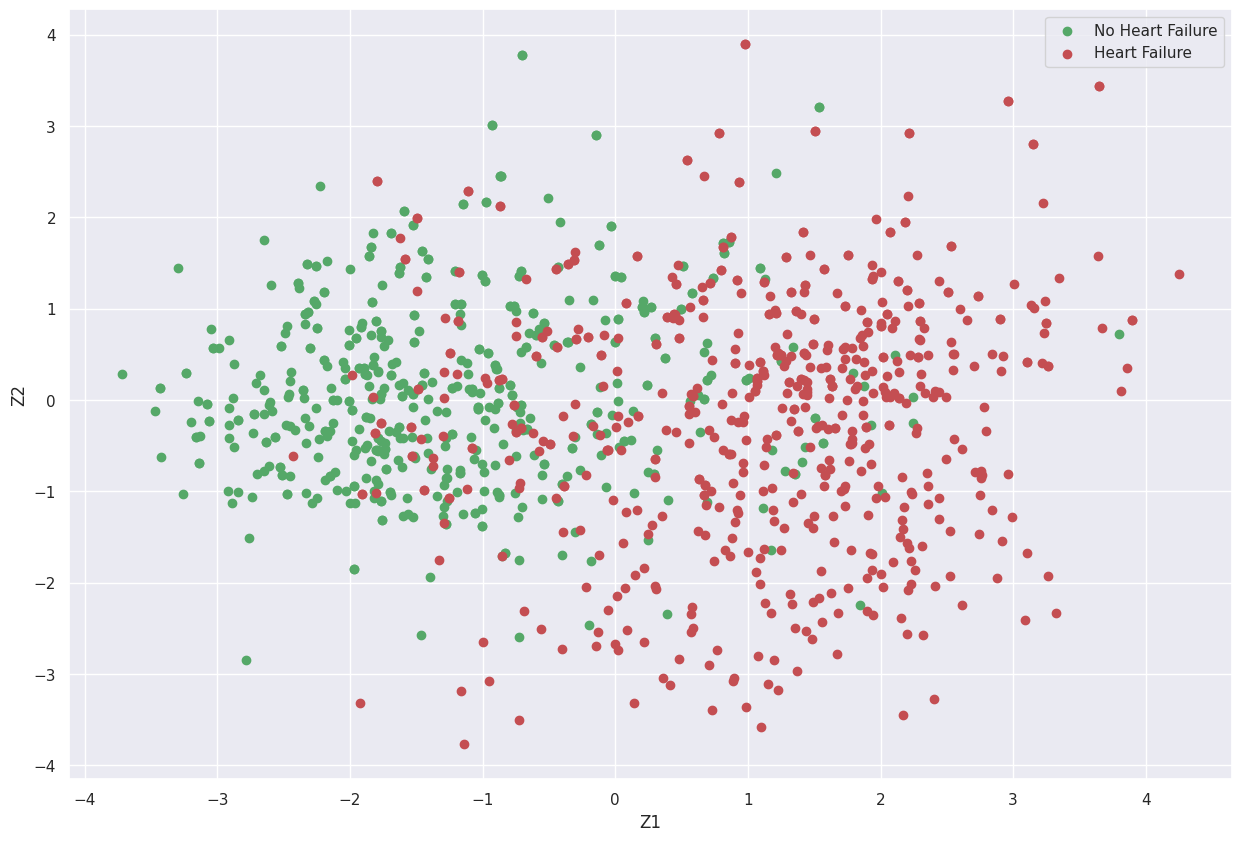

In [14]:
plt.figure(figsize = (15,10))
plt.scatter(Z[idx_NoHeartFailure,0],Z[idx_NoHeartFailure,1], c='g', label='No Heart Failure')
plt.scatter(Z[idx_HeartFailure,0],Z[idx_HeartFailure,1], c='r', label='Heart Failure')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()
plt.close()

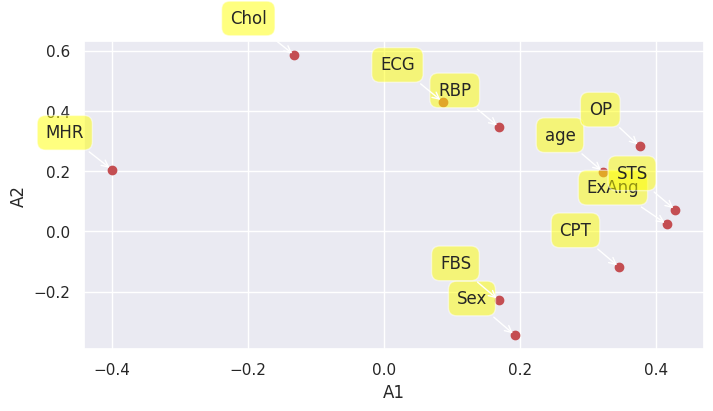

In [15]:
A = pca.components_.T
plt.figure(figsize=(8,4))
plt.scatter(A[:,0], A[:,1], c='r')
plt.xlabel('A1')
plt.ylabel('A2')

variables = Xcols

for label, x, y in zip(variables, A[:,0], A[:,1]):
   plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()



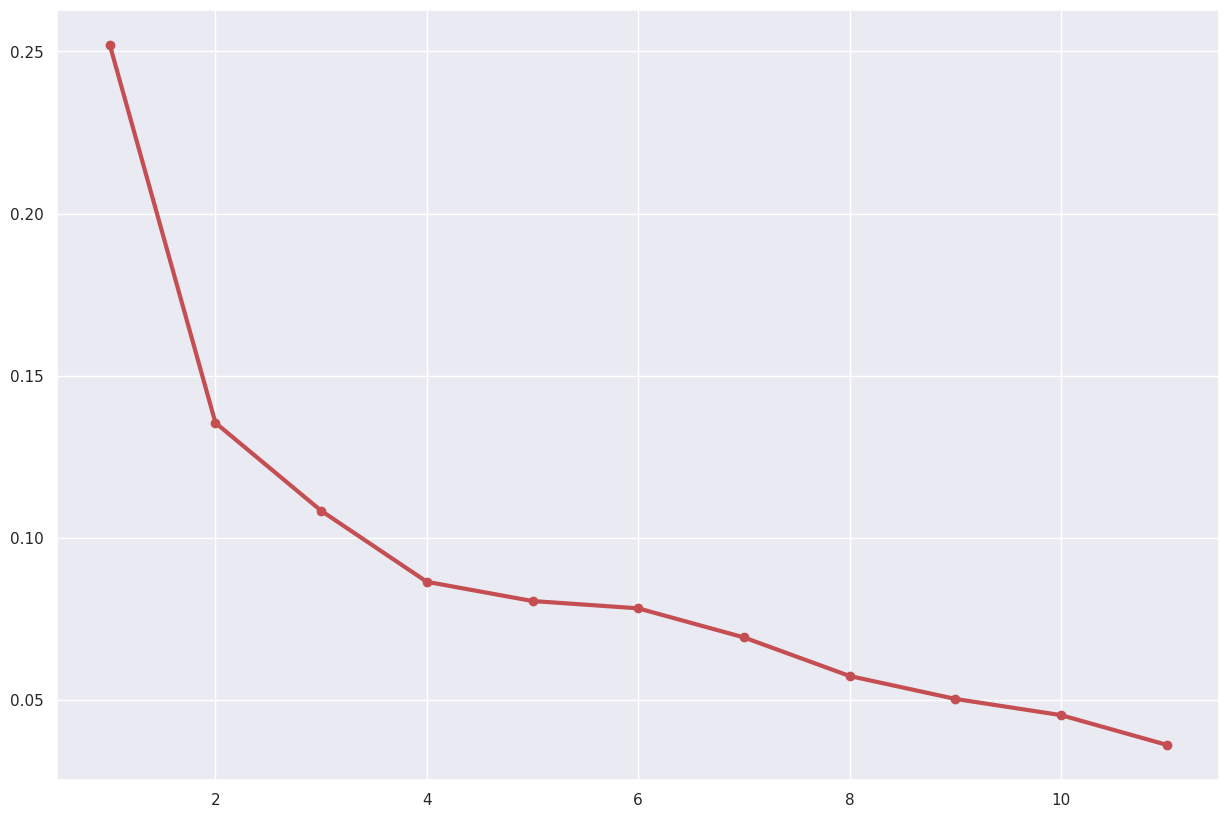

In [16]:
#eigenvalues

Lambda = pca.explained_variance_

x = np.arange(len(Lambda)) + 1

plt.figure(figsize=(15,10))
plt.plot(x, Lambda/sum(Lambda), 'ro-', lw=3)
plt.show()

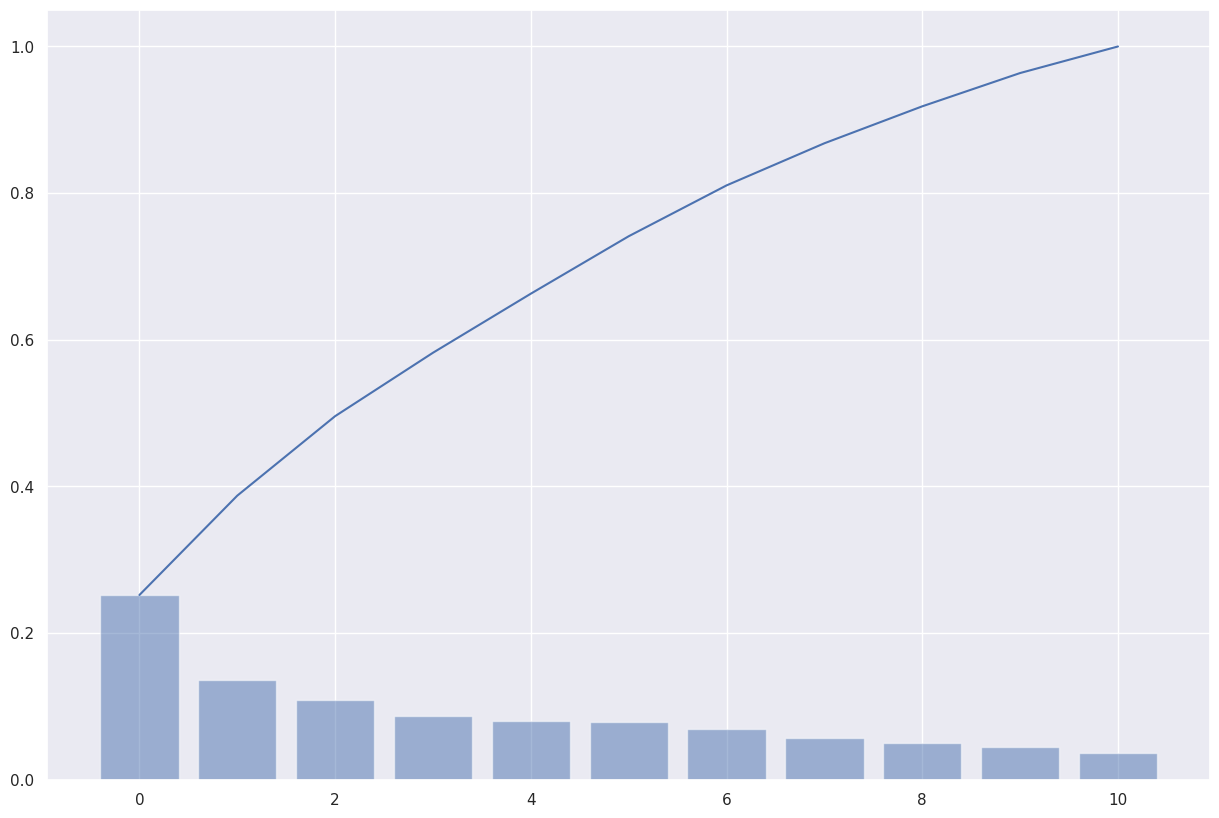

In [17]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.show()

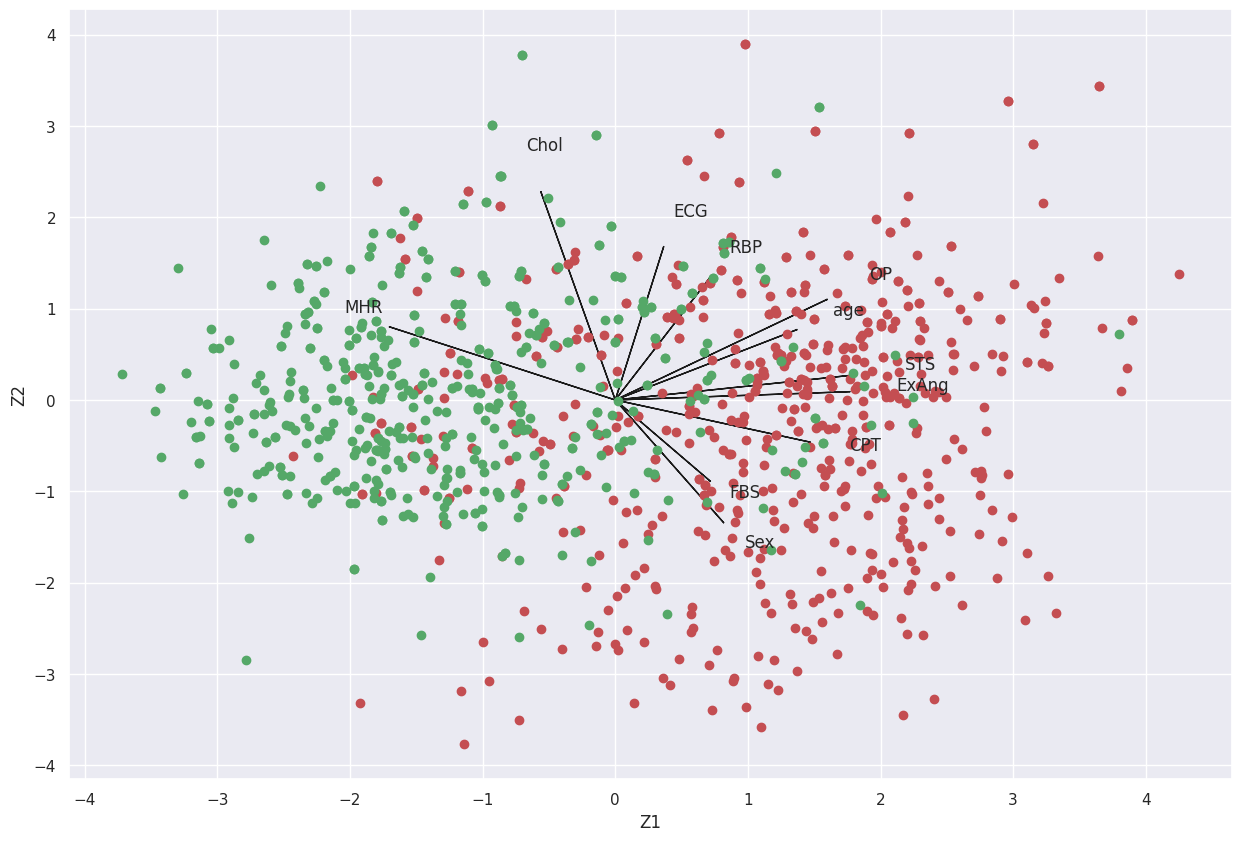

In [18]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A)):
  plt.arrow(0,0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width = 0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2, Xcols[i])

plt.scatter(Z[idx_HeartFailure,0], Z[idx_HeartFailure,1], c='r', label='Heart Failure')
plt.scatter(Z[idx_NoHeartFailure,0], Z[idx_NoHeartFailure,1], c='g', label='No Heart Failure')

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


           PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    -2.603235 -0.021697 -0.317470  0.067019 -1.685085 -0.223409 -0.156997
1    -0.751117  0.849152  0.218999  1.361476 -0.333598  1.459255 -0.338697
2    -1.529505 -0.409605 -0.266483  0.149029 -0.489390 -1.004022  0.683392
3     1.118272  0.273826 -1.260783  1.714777  0.774037  0.896628 -0.724429
4    -0.751604 -0.609897  0.568496  1.296107 -0.748685 -1.011641  0.392287
...        ...       ...       ...       ...       ...       ...       ...
1185 -1.298599 -0.393227 -0.732307 -0.397618 -0.941126  1.209466  1.832635
1186  2.038180  0.031984  1.295698 -0.256069 -0.723393  1.424641 -0.308241
1187  1.701523 -0.999651 -0.897530  0.733352 -0.009774 -0.247772  0.282241
1188 -1.625701  1.778003  0.797530 -0.587203  1.119351  0.745602  0.609344
1189 -2.188101 -0.878453 -0.472744 -0.057377 -1.218064 -0.328176 -0.538695

[1190 rows x 7 columns]
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '7 Principal Components explain [86.80%] of the variance'}, xlabel='PC1 (25.2% expl.var)', ylabel='PC2 (13.5% expl.var)'>)

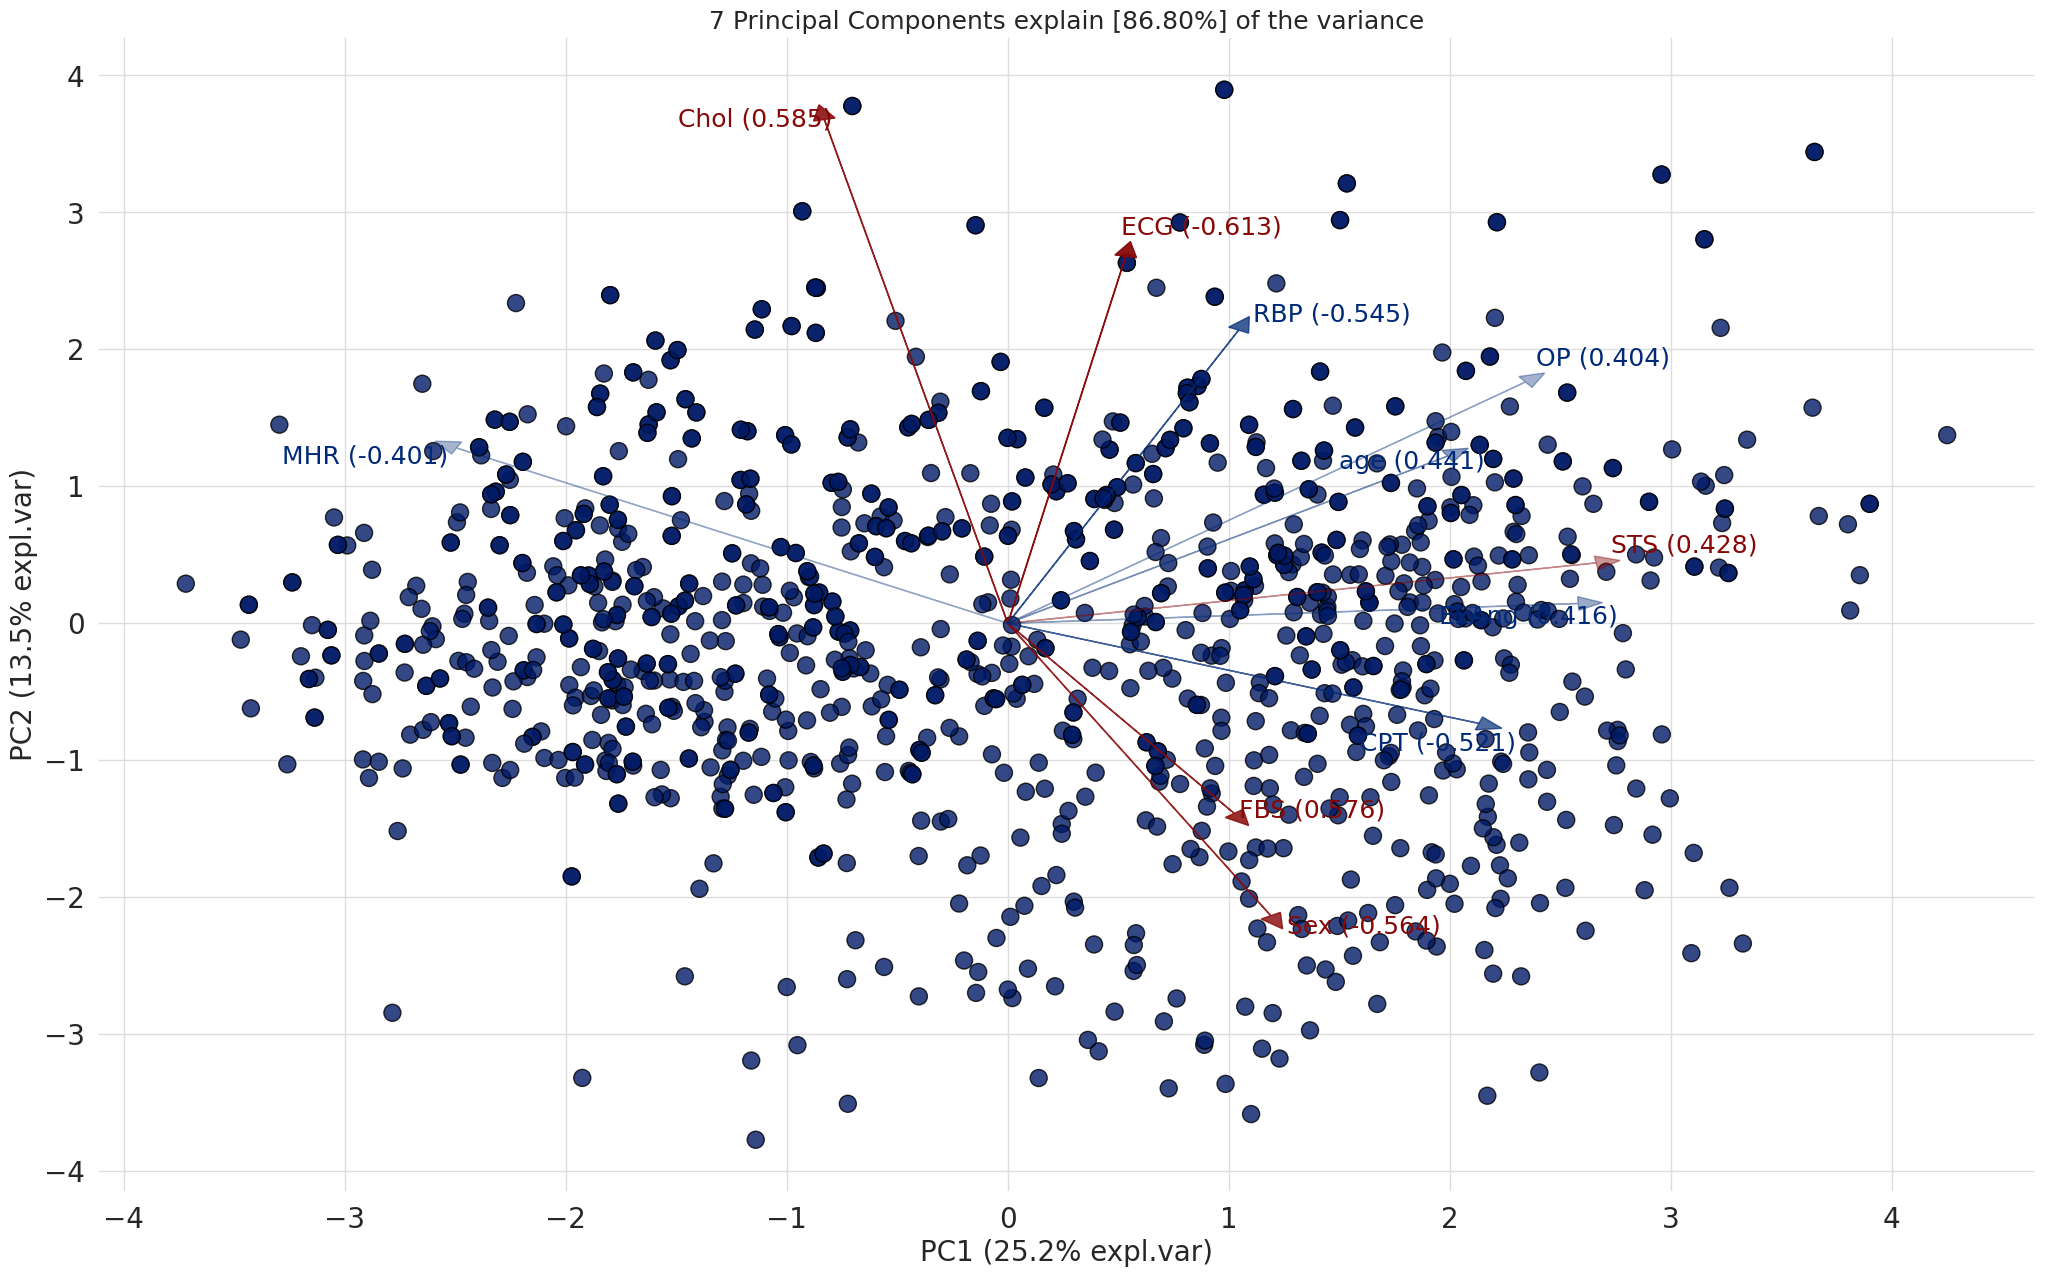

In [21]:
model = pca(n_components=0.8)
out = model.fit_transform(X)

print(out['PC'])

# model.scatter(label=True, legend=False)
# plt.show()

model.biplot()

# model.biplot3d()

In [22]:
from pycaret.classification import *

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(1190, 12)"
4,Transformed data shape,"(1190, 12)"
5,Transformed train set shape,"(833, 12)"
6,Transformed test set shape,"(357, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8919,0.9494,0.9159,0.8852,0.8997,0.7826,0.7844,0.3530
rf,Random Forest Classifier,0.8895,0.9436,0.9295,0.8718,0.8994,0.7772,0.7800,0.2660
lightgbm,Light Gradient Boosting Machine,0.8822,0.9372,0.8909,0.8875,0.8884,0.7636,0.7652,0.1740
xgboost,Extreme Gradient Boosting,0.8774,0.9388,0.8932,0.8782,0.8847,0.7538,0.7557,0.0960
gbc,Gradient Boosting Classifier,0.8630,0.9282,0.8750,0.8688,0.8711,0.7249,0.7264,0.2060
ada,Ada Boost Classifier,0.8462,0.9037,0.8545,0.8563,0.8542,0.6915,0.6939,0.1600
knn,K Neighbors Classifier,0.8332,0.8904,0.8500,0.8390,0.8436,0.6649,0.6666,0.0820
ridge,Ridge Classifier,0.8198,0.8845,0.8227,0.8342,0.8279,0.6387,0.6398,0.0470
lda,Linear Discriminant Analysis,0.8198,0.8844,0.8227,0.8342,0.8279,0.6387,0.6398,0.0460
nb,Naive Bayes,0.8198,0.8862,0.8159,0.8399,0.8268,0.6391,0.6411,0.0750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(1190, 12)"
4,Transformed data shape,"(1190, 11)"
5,Transformed train set shape,"(833, 11)"
6,Transformed test set shape,"(357, 11)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8836,0.9522,0.9045,0.8791,0.8910,0.7660,0.7677,0.3130
lightgbm,Light Gradient Boosting Machine,0.8799,0.9320,0.9023,0.8761,0.8882,0.7587,0.7606,0.4540
rf,Random Forest Classifier,0.8752,0.9376,0.8886,0.8775,0.8822,0.7494,0.7512,0.4000
xgboost,Extreme Gradient Boosting,0.8703,0.9285,0.8955,0.8659,0.8795,0.7392,0.7417,0.1600
gbc,Gradient Boosting Classifier,0.8498,0.9227,0.8477,0.8659,0.8563,0.6991,0.7000,0.3680
knn,K Neighbors Classifier,0.8344,0.8925,0.8477,0.8432,0.8446,0.6674,0.6689,0.0700
ada,Ada Boost Classifier,0.8150,0.8893,0.8182,0.8312,0.8241,0.6290,0.6300,0.1940
lr,Logistic Regression,0.8114,0.8830,0.8250,0.8197,0.8218,0.6214,0.6225,0.0530
nb,Naive Bayes,0.8090,0.8814,0.8273,0.8172,0.8208,0.6163,0.6194,0.0480
ridge,Ridge Classifier,0.8102,0.8829,0.8159,0.8239,0.8191,0.6194,0.6208,0.0820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8466,0.7727,0.8095,0.7907,0.5714,0.5721
1,0.9286,0.9659,0.9091,0.9524,0.9302,0.8571,0.8581
2,0.8571,0.9119,0.9318,0.8200,0.8723,0.7117,0.7192
3,0.8313,0.9248,0.8409,0.8409,0.8409,0.6614,0.6614
4,0.8554,0.8904,0.8864,0.8478,0.8667,0.7089,0.7098
5,0.7831,0.8666,0.7727,0.8095,0.7907,0.5660,0.5666
6,0.6988,0.8287,0.7045,0.7209,0.7126,0.3963,0.3964
7,0.7831,0.8526,0.7955,0.7955,0.7955,0.5647,0.5647
8,0.7711,0.8683,0.7955,0.7778,0.7865,0.5398,0.5400


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8466,0.7727,0.8095,0.7907,0.5714,0.5721
1,0.9286,0.9659,0.9091,0.9524,0.9302,0.8571,0.8581
2,0.8571,0.9119,0.9318,0.8200,0.8723,0.7117,0.7192
3,0.8313,0.9248,0.8409,0.8409,0.8409,0.6614,0.6614
4,0.8554,0.8904,0.8864,0.8478,0.8667,0.7089,0.7098
5,0.7831,0.8666,0.7727,0.8095,0.7907,0.5660,0.5666
6,0.6988,0.8287,0.7045,0.7209,0.7126,0.3963,0.3964
7,0.7831,0.8526,0.7955,0.7955,0.7955,0.5647,0.5647
8,0.7711,0.8689,0.7955,0.7778,0.7865,0.5398,0.5400


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7738,0.8523,0.7955,0.7778,0.7865,0.5461,0.5462
1,0.9286,0.9696,0.8864,0.9750,0.9286,0.8575,0.8614
2,0.7619,0.8599,0.8409,0.7400,0.7872,0.5195,0.5249
3,0.8554,0.9164,0.8636,0.8636,0.8636,0.7098,0.7098
4,0.9036,0.9108,0.9091,0.9091,0.9091,0.8065,0.8065
5,0.8313,0.8931,0.7955,0.8750,0.8333,0.6634,0.6665
6,0.7952,0.8348,0.7955,0.8140,0.8046,0.5895,0.5896
7,0.7831,0.8625,0.8182,0.7826,0.8000,0.5634,0.5641
8,0.8193,0.9152,0.8409,0.8222,0.8315,0.6367,0.6369


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8810,0.9239,0.8864,0.8864,0.8864,0.7614,0.7614
1,0.9524,0.9778,0.9318,0.9762,0.9535,0.9048,0.9058
2,0.8690,0.9463,0.9091,0.8511,0.8791,0.7366,0.7385
3,0.9036,0.9525,0.9091,0.9091,0.9091,0.8065,0.8065
4,0.9157,0.9441,0.9545,0.8936,0.9231,0.8300,0.8322
5,0.9036,0.9411,0.8864,0.9286,0.9070,0.8071,0.8080
6,0.7952,0.8654,0.7955,0.8140,0.8046,0.5895,0.5896
7,0.8434,0.9403,0.8636,0.8444,0.8539,0.6851,0.6853
8,0.8795,0.9586,0.9318,0.8542,0.8913,0.7567,0.7603


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8278,0.7727,0.8095,0.7907,0.5714,0.5721
1,0.8690,0.9443,0.8182,0.9231,0.8675,0.7390,0.7442
2,0.8571,0.9097,0.9091,0.8333,0.8696,0.7123,0.7156
3,0.8072,0.9009,0.8182,0.8182,0.8182,0.6131,0.6131
4,0.8554,0.8869,0.8864,0.8478,0.8667,0.7089,0.7098
5,0.7470,0.8479,0.7273,0.7805,0.7529,0.4943,0.4956
6,0.6867,0.8193,0.6818,0.7143,0.6977,0.3730,0.3735
7,0.7711,0.8246,0.7955,0.7778,0.7865,0.5398,0.5400
8,0.8193,0.8834,0.7955,0.8537,0.8235,0.6388,0.6405


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8214,0.8528,0.7955,0.8537,0.8235,0.6433,0.6449
1,0.8810,0.9636,0.8182,0.9474,0.8780,0.7630,0.7708
2,0.8571,0.9193,0.9091,0.8333,0.8696,0.7123,0.7156
3,0.8313,0.9167,0.8182,0.8571,0.8372,0.6624,0.6632
4,0.8313,0.9033,0.8636,0.8261,0.8444,0.6604,0.6612
5,0.7952,0.8782,0.7955,0.8140,0.8046,0.5895,0.5896
6,0.7470,0.8269,0.7273,0.7805,0.7529,0.4943,0.4956
7,0.7831,0.8619,0.7727,0.8095,0.7907,0.5660,0.5666
8,0.7831,0.8846,0.7727,0.8095,0.7907,0.5660,0.5666


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


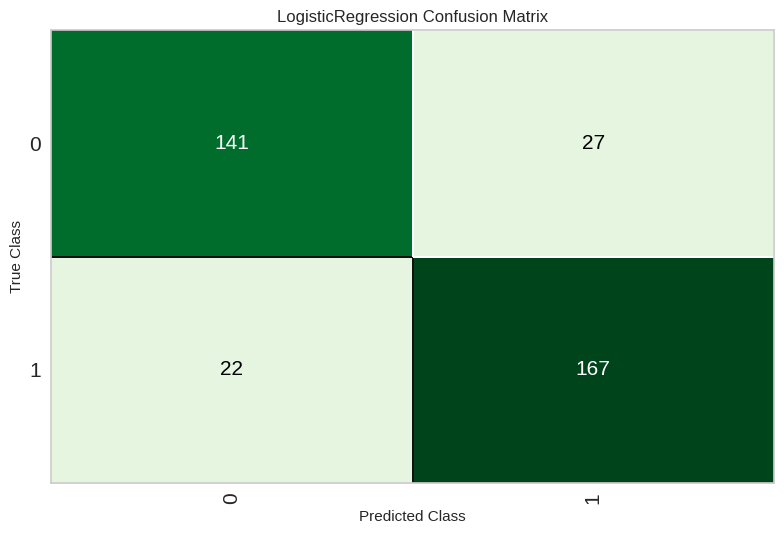

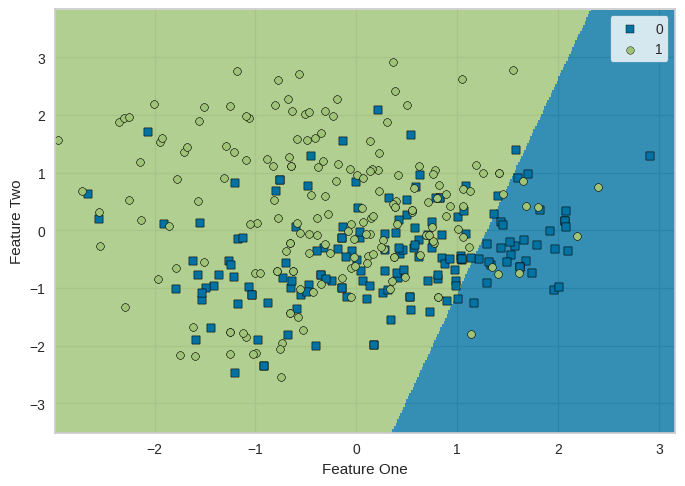

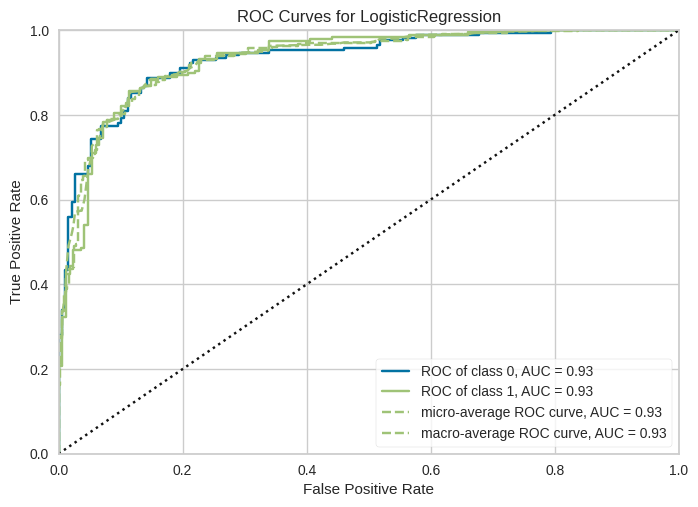

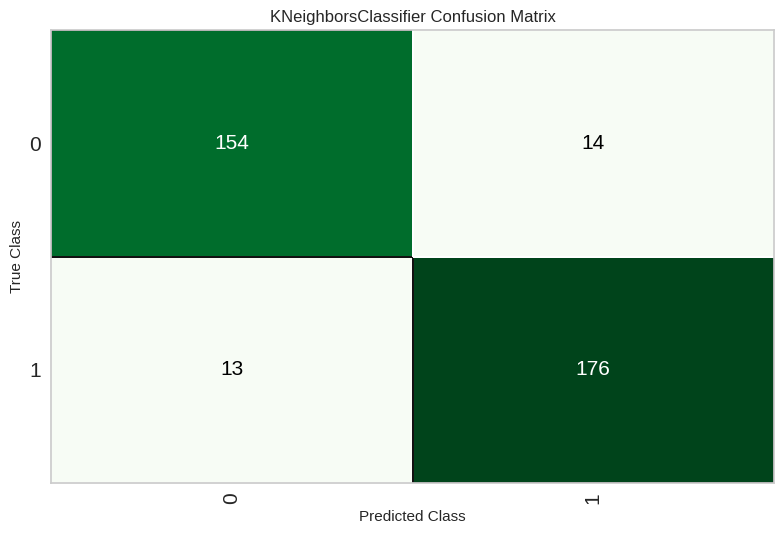

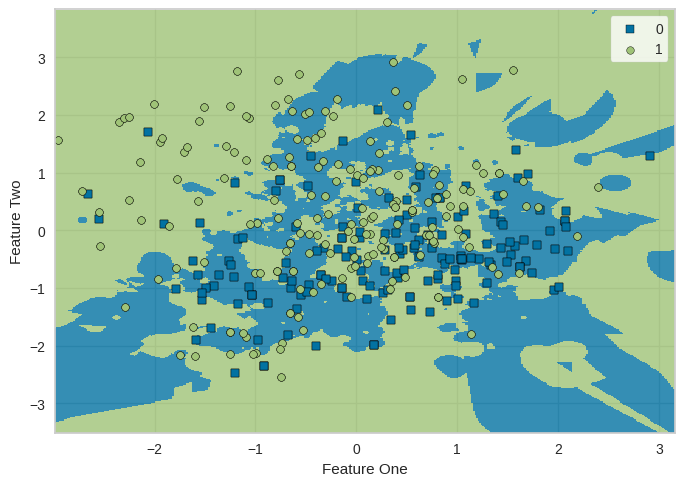

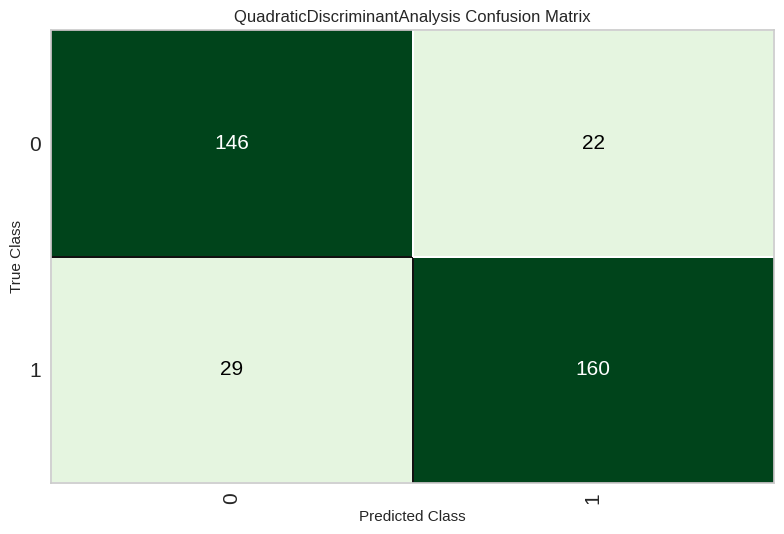

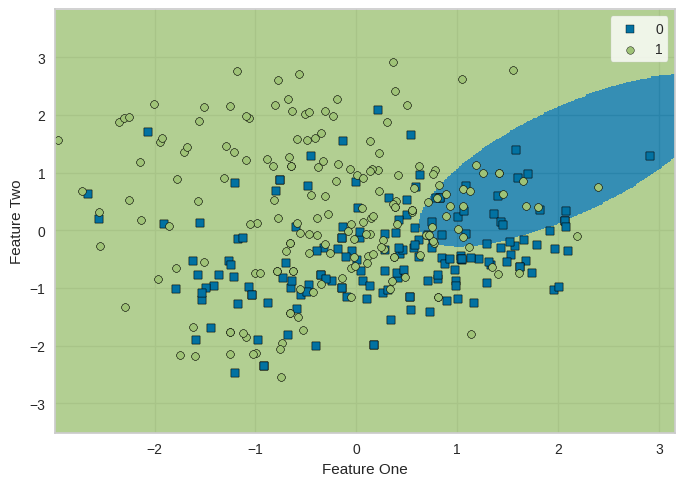

In [33]:
# Setup dataset in PyCaret
setup_data = setup(df, target='Target', session_id=123, normalize=True)

# Compare models before PCA
best_before_pca = compare_models(sort='F1')

# Apply PCA and re-compare models
setup_data = setup(df, target='Target', session_id=123, normalize=True, pca=True, pca_components=0.95)
best_after_pca = compare_models(sort='F1')

# Create and tune models
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize='F1')

knn = create_model('knn')
tuned_knn = tune_model(knn, optimize='F1')

qda = create_model('qda')
tuned_qda = tune_model(qda, optimize='F1')

# Plot model metrics and decision boundaries
plot_model(tuned_lr, plot='confusion_matrix')
plot_model(tuned_lr, plot='boundary')
plot_model(tuned_lr, plot='auc')

plot_model(tuned_knn, plot='confusion_matrix')
plot_model(tuned_knn, plot='boundary')

plot_model(tuned_qda, plot='confusion_matrix')
plot_model(tuned_qda, plot='boundary')


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [26]:
# Assuming 'Target' is the column name for labels
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally apply PCA
pca = PCA(n_components=0.95)  # Adjust components to retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [27]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca, y_train)  # Use X_train_scaled instead of X_train_pca to avoid PCA

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn_model.fit(X_train_pca, y_train)  # Use X_train_scaled instead of X_train_pca to avoid PCA


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix:
[[ 89  18]
 [ 16 115]]

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.87      0.91      0.89       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

Confusion Matrix:
[[ 89  18]
 [ 12 119]]


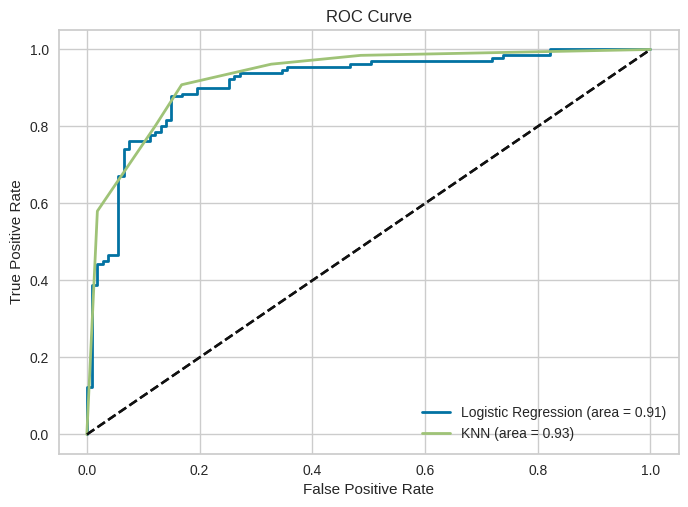

In [28]:
# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

# Evaluation for Logistic Regression
lr_predictions = lr_model.predict(X_test_pca)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

lr_probs = lr_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, 'Logistic Regression (area = %0.2f)' % roc_auc)

# Evaluation for KNN
knn_predictions = knn_model.predict(X_test_pca)
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

knn_probs = knn_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, 'KNN (area = %0.2f)' % roc_auc)

plt.show()
